In [1]:
import pandas as pd  
from selenium import webdriver   
import time  
from tqdm.notebook import tqdm 
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup as bs
import requests
import nltk
import re

/opt/anaconda3/lib/python3.7/site-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.11) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [31]:
page = 0
#10, 20

keyword = "'클래스팅'"

# URL 만들기
url = f"https://www.google.com/search?q={keyword}&sca_esv=594127581&tbm=nws&sxsrf=AM9HkKk2GHGxRdc8VzZxAXkwJzAKe94ooQ:1703730654080&ei=3t2MZeC_BJrY1e8PyLK08Ak&start={page}&sa=N&ved=2ahUKEwjgpreji7GDAxUabPUHHUgZDZ4Q8tMDegQIBBAG&biw=1861&bih=891&dpr=1"
print(url)

https://www.google.com/search?q='클래스팅'&sca_esv=594127581&tbm=nws&sxsrf=AM9HkKk2GHGxRdc8VzZxAXkwJzAKe94ooQ:1703730654080&ei=3t2MZeC_BJrY1e8PyLK08Ak&start=0&sa=N&ved=2ahUKEwjgpreji7GDAxUabPUHHUgZDZ4Q8tMDegQIBBAG&biw=1861&bih=891&dpr=1


In [32]:
headers = {"user-agent":"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/120.0.0.0 Safari/537.36"}


response = requests.get(url, headers=headers)

In [33]:
html = bs(response.text, "lxml")
html

html.title.string

"'클래스팅' - Google 검색"

In [34]:
title_list = html.select("#rso > div > div > div > div > div > a > div > div.iRPxbe > div.n0jPhd.ynAwRc.MBeuO.nDgy9d")

In [ ]:
# title_list

In [38]:
title_list_txt = []

for i in range(len(title_list)) :
    title_list_txt.append(title_list[i].text)
title_list_txt


["클래스팅, 에듀테크 페어서 'AI 코스웨어' 선보여",
 '클래스팅, 에듀테크 코리아 페어서 AI 코스웨어 선보여',
 "클래스팅, 인천광역시교육청에 '클래스팅 AI 러닝' 라이선스 일괄 공급",
 '클래스팅, 인천교육청에 AI코스웨어 라이선스 공급',
 '클래스팅, 인천시교육청에 AI 코스웨어 라이선스 일괄 공급',
 '클래스팅, 챗GPT에 프롬프트 기술 더한 교육자 전용 AI 챗봇...공교육 분야 물꼬 튼다',
 "클래스팅, NLP 학회서 'AI 수학 능력 향상' 메인 논문 채택",
 "클래스팅, 모든 학교에 'AI코스웨어' 1개월 무료 이용권 제공",
 '[스타트업 수상 소식] 그렉터, 오아시스비즈니스, 캐럿펀트, 클루메틱, 머니스테이션, 루나소프트, 크로커스, 클래스팅, 리코 ...',
 '부산시교육청, ′학력향상지원시스템′(BASS) 개통 앞두고 학부모 연수']

In [39]:
content_list = html.select("#rso > div > div > div > div > div > a > div > div.iRPxbe > div.GI74Re.nDgy9d")

In [40]:
content_list_txt = []

for i in range(len(content_list)) :
    content_list_txt.append(content_list[i].text)
content_list_txt


["인공지능(AI) 에듀테크 클래스팅(대표 조현구)은 서울 코엑스에서 열린 '2023 에듀테크 코리아 페어'에 참가, AI 코스웨어를 통한 \n개별 맞춤형 교육...",
 "클래스팅은 AI 기반의 학습관리시스템(LMS)인 '클래스팅'을 통해 학생 수준별 개별 맞춤학습과 교사의 지도 방식을 경험할 수 있는 \n부스를 운영했다.",
 "AI 코스웨어(교육용 소프트웨어)인 '클래스팅 AI 러닝'은 인공지능 기술을 기반으로 맞춤형 학습을 제공하는 학습관리 솔루션으로, 최신 \n트랜스포머...",
 "이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫폼 '데이터랩'에서 볼 수 있습니다.]클래스팅이 \n인공지능(AI)을...",
 "인천시교육청은 라이선스를 일괄 구매, 자체 플랫폼에 연동했다. 인천교육청 디지털교육 특화 플랫폼인 '인천무크(i-MOOC)'를 통해 \n서비스되며, 학생과...",
 "인공지능 기반 학습관리시스템인 클래스팅(대표 조현구)이 챗GPT를 탑재한 새로운 AI 보조교사 '젤로'를 4일 출시했다.젤로는 \n오픈AI의 GPT 기반 AI...",
 "에듀테크 인공지능(AI) 전문 클래스팅(대표 조현구)이 최근 글로벌 자연어처리 학회 'EMNLP 2023'에서 연세대학교와 수학 단어 \n문제 해결 능력 향상을...",
 "댓글 ... 클래스팅은 모든 학교에서 인공지능(AI) 코스웨어(교육용 소프트웨어)를 경험해볼 수 있도록 '클래스팅 AI 러닝' 1개월 \n무료 이용권을 제공한다고...",
 "그렉터, 대한민국 도시혁신대상 “2년 연속 대상”. 스마트시티 혁신기업 '그렉터'가 '2023 대한민국 도시혁신대상'에서 2년 연속 \n'행정안전부 장관상'...",
 "인공지능(AI)과 빅데이터를 이용해 학생 수준에 맞는 학습을 지원하는 공교육 프로그램이 부산에서 처음 운영된다.△ 하윤수 교육감이 7일 \n'BASS..."]

In [41]:
df_title_list_txt = pd.DataFrame(title_list_txt)
df_content_list_txt = pd.DataFrame(content_list_txt)

In [43]:
title_content = pd.concat([df_title_list_txt, df_content_list_txt],axis=1)

title_content

,0,0
0,"클래스팅, 에듀테크 페어서 'AI 코스웨어' 선보여",인공지능(AI) 에듀테크 클래스팅(대표 조현구)은 서울 코엑스에서 열린 '2023 ...
1,"클래스팅, 에듀테크 코리아 페어서 AI 코스웨어 선보여",클래스팅은 AI 기반의 학습관리시스템(LMS)인 '클래스팅'을 통해 학생 수준별 개...
2,"클래스팅, 인천광역시교육청에 '클래스팅 AI 러닝' 라이선스 일괄 공급",AI 코스웨어(교육용 소프트웨어)인 '클래스팅 AI 러닝'은 인공지능 기술을 기반으...
3,"클래스팅, 인천교육청에 AI코스웨어 라이선스 공급",이 기사에 나온 스타트업에 대한 보다 다양한 기업정보는 유니콘팩토리 빅데이터 플랫폼...
4,"클래스팅, 인천시교육청에 AI 코스웨어 라이선스 일괄 공급","인천시교육청은 라이선스를 일괄 구매, 자체 플랫폼에 연동했다. 인천교육청 디지털교육..."
5,"클래스팅, 챗GPT에 프롬프트 기술 더한 교육자 전용 AI 챗봇...공교육 분야 물...",인공지능 기반 학습관리시스템인 클래스팅(대표 조현구)이 챗GPT를 탑재한 새로운 A...
6,"클래스팅, NLP 학회서 'AI 수학 능력 향상' 메인 논문 채택",에듀테크 인공지능(AI) 전문 클래스팅(대표 조현구)이 최근 글로벌 자연어처리 학회...
7,"클래스팅, 모든 학교에 'AI코스웨어' 1개월 무료 이용권 제공",댓글 ... 클래스팅은 모든 학교에서 인공지능(AI) 코스웨어(교육용 소프트웨어)를...
8,"[스타트업 수상 소식] 그렉터, 오아시스비즈니스, 캐럿펀트, 클루메틱, 머니스테이션...","그렉터, 대한민국 도시혁신대상 “2년 연속 대상”. 스마트시티 혁신기업 '그렉터'가..."
9,"부산시교육청, ′학력향상지원시스템′(BASS) 개통 앞두고 학부모 연수",인공지능(AI)과 빅데이터를 이용해 학생 수준에 맞는 학습을 지원하는 공교육 프로그...


In [101]:
import pandas as pd   
import time  
from bs4 import BeautifulSoup as bs
import requests
import nltk
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from konlpy.tag import Okt
from collections import Counter
import stylecloud


#크롤러

headers = {"user-agent":"###"}



def get_news_list(keyword, page):
    url = f"https://www.google.com/search?q={keyword}&sca_esv=594127581&tbm=nws&sxsrf=AM9HkKk2GHGxRdc8VzZxAXkwJzAKe94ooQ:1703730654080&ei=3t2MZeC_BJrY1e8PyLK08Ak&start={page}&sa=N&ved=2ahUKEwjgpreji7GDAxUabPUHHUgZDZ4Q8tMDegQIBBAG&biw=1861&bih=891&dpr=1"
    response = requests.get(url, headers=headers)
    html = bs(response.text, "lxml")
    title_list = html.select("#rso > div > div > div > div > div > a > div > div.iRPxbe > div.n0jPhd.ynAwRc.MBeuO.nDgy9d")
    content_list = html.select("#rso > div > div > div > div > div > a > div > div.iRPxbe > div.GI74Re.nDgy9d")
    
    title_list_txt = []

    for i in range(len(title_list)) :
        title_list_txt.append(title_list[i].text)
        
    content_list_txt = []

    for i in range(len(content_list)) :
        content_list_txt.append(content_list[i].text)
    
    df_title_list_txt = pd.DataFrame(title_list_txt)
    df_content_list_txt = pd.DataFrame(content_list_txt)
    title_content = pd.concat([df_title_list_txt, df_content_list_txt],axis=1) 
    
    return title_content

In [102]:
#페이지 넘기면서 긁기 

news_list_df = pd.DataFrame()


for i in range(0, 60, 10):
    title_content = get_news_list('밀당피티', i)
    news_list_df = pd.concat([news_list_df,title_content])


In [103]:
news_list_df = news_list_df.reset_index(drop=True)
news_list_df.columns = ["제목","미리보기"]

qanda = news_list_df

In [104]:
# def make_style_wordcloud(keyword):

#     tmp = keyword.apply(lambda x: str(x["제목"]) + str(x["미리보기"]), axis=1)
#     corpus = " ".join(tmp.tolist())


#     okt = Okt()
#     nouns = okt.nouns(corpus) 
#     words = [n for n in nouns if len(n) > 1]
#      # 단어의 길이가 1개인 것은 제외
#     c = Counter(words)
#     custom_stopwords = ["클래스팅", "스팅"]
#     return stylecloud.gen_stylecloud(font_path='System/Library/Fonts/JejuGothic.ttf',text=c,icon_name="fas fa-circle", custom_stopwords = custom_stopwords, output_name=f"wordcloud.png")
    

In [105]:
# make_style_wordcloud(classting)

In [119]:
def make_good_style_wordcloud(keyword):

    tmp = keyword.apply(lambda x: str(x["제목"]) + str(x["미리보기"]), axis=1)
    corpus = " ".join(tmp.tolist())

    #영어 한국어 추출
    english_text = ' '.join(re.findall(r'[a-zA-Z]+', corpus))
    korean_text = ' '.join(re.findall(r'[ㄱ-ㅎㅏ-ㅣ가-힣]+', corpus))

    #한국어 처리
    okt = Okt()
    def tokenize_kor(korean_text):
        return [n for n in okt.nouns(korean_text) if len(n) > 1] # 단어의 길이가 1개인 것은 제외


    #영어 처리
    
    def tokenize_eng(english_text):
        is_noun = lambda pos: pos[:2]=="NN"
        tokenized = nltk.word_tokenize(english_text)
        return [word for (word,pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    
    all_nouns = tokenize_kor(korean_text) + tokenize_eng(english_text)

    c = Counter(all_nouns)
    custom_stopwords = [""]
    return stylecloud.gen_stylecloud(font_path='System/Library/Fonts/JejuGothic.ttf',text=c,icon_name="fas fa-circle", custom_stopwords = custom_stopwords, output_name=f"wordcloud.png")

In [120]:
make_good_style_wordcloud(qanda)

In [108]:
# tmp = classting.apply(lambda x: str(x["제목"]) + str(x["미리보기"]), axis=1)
# corpus = " ".join(tmp.tolist())

# english_text = re.findall(r'[a-zA-Z]+', corpus)
# korean_text = re.findall(r'[ㄱ-ㅎㅏ-ㅣ가-힣]+', corpus)

In [109]:
# def make_wordcloud(keyword):
    
#     # text = pd.read_csv(f"data/novel_list_top_100_{장르}.csv")
#     tmp = keyword.apply(lambda x: str(x["제목"]) + str(x["미리보기"]), axis=1)
#     corpus = " ".join(tmp.tolist())

#     #영어 한국어 추출
#     english_text = ' '.join(re.findall(r'[a-zA-Z]+', corpus))
#     korean_text = ' '.join(re.findall(r'[ㄱ-ㅎㅏ-ㅣ가-힣]+', corpus))

#     #한국어 처리
#     okt = Okt()
#     def tokenize_kor(korean_text):
#         return [n for n in okt.nouns(korean_text) if len(n) > 1] # 단어의 길이가 1개인 것은 제외

#     def tokenize_eng(english_text):
#         is_noun = lambda pos: pos[:2]=="NN"
#         tokenized = nltk.word_tokenize(english_text)
#         return [word for (word,pos) in nltk.pos_tag(tokenized) if is_noun(pos)] 
    
#     all_nouns = tokenize_kor(korean_text) + tokenize_eng(english_text)


#      # 단어의 길이가 1개인 것은 제외
#     c = Counter(all_nouns) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함
#     wc = WordCloud(font_path='System/Library/Fonts/JejuGothic.ttf', scale=2.0,background_color='white')
#     gen = wc.generate_from_frequencies(c)
#     plt.figure()
#     plt.figure(figsize = (12, 10))
#     plt.axis('off')
    
#     return plt.imshow(gen)
    

<Figure size 432x288 with 0 Axes>

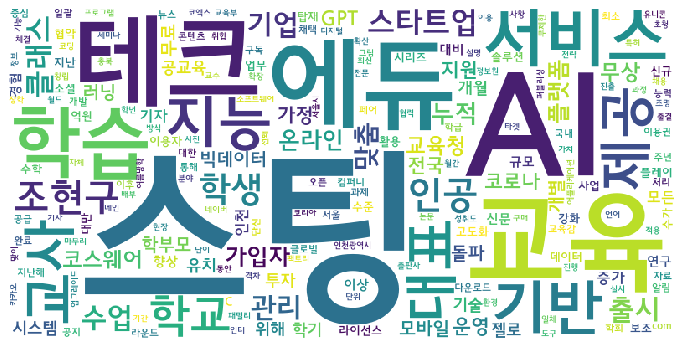

In [148]:
make_wordcloud(classting)

In [1]:
#ㅋㅋ
